<p style="font-family:courier;">1. We read the file Accidents and keep the latitude and longitude of them </p>

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

f = open('../Data/Accidents2.csv', 'r')
cs = csv.reader(f)
cs.next()

data = []
rows = []

for row in cs:
    lon = float(row[-2])
    lat = float(row[-1])
    data.append([lon, lat])
    rows.append(row)

X = np.asarray(data)

<p style="font-family:courier;">2. Plot accidents</p>

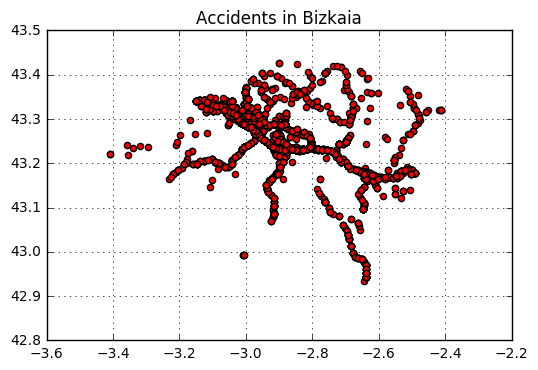

In [2]:
fig, ax = plt.subplots()
plt.scatter(X[:,0], X[:,1], c='r', marker='o')
ax.grid(True)
plt.title('Accidents in Bizkaia')
plt.show()

<p style="font-family:courier;">3. Compute k-nearest neighboors</p>

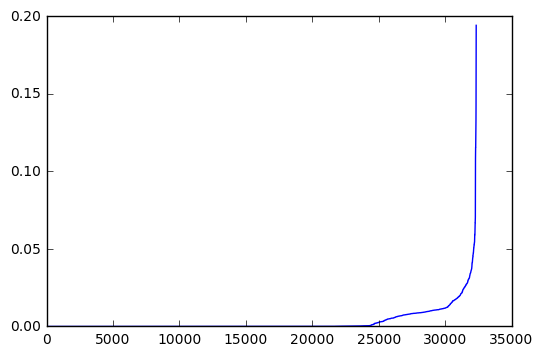

In [3]:
from sklearn.neighbors import DistanceMetric, kneighbors_graph
dist = DistanceMetric.get_metric('euclidean')
matdist = dist.pairwise(X)

min_samples = 10
A = kneighbors_graph(X, min_samples, include_self=False)
Arr = A.toarray()

seq = []
for i in xrange(len(data)):
    for j in xrange(len(data)):
        if Arr[i][j] != 0:
            seq.append(matdist[i][j])
            
seq.sort()
plt.plot(seq)
plt.show()

<p style="font-family:courier;">4. We get the number of clusters with DBSCAN</p>

In [4]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.0095, min_samples=10).fit(X)
unique_labels = set(db.labels_)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

print 'Number of clusters: ', n_clusters

Number of clusters:  55


<p style="font-family:courier;">5. We show the silhoutte coefficient</p>

In [ ]:
# Validation/Evaluation
from sklearn import metrics
print "Silhoutte Coefficient: %0.3f" % metrics.silhouette_score(X, db.labels_)

Silhoutte Coefficient: 0.257


<p style="font-family:courier;">6. Plot the clusters</p>

/home/dolores/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1145: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


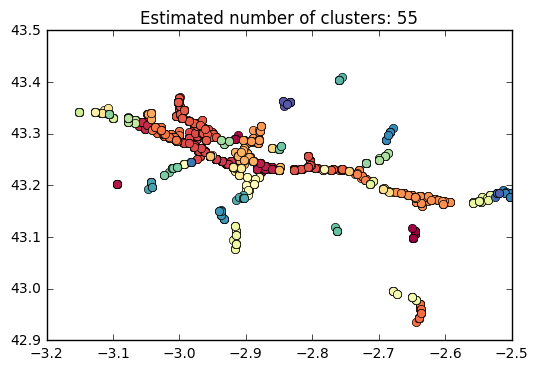

In [ ]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k != -1:
        class_member_mask = (db.labels_ == k)
        xy = X[db.labels_ == k]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markersize=6)
plt.title('Estimated number of clusters: %d' % n_clusters)
plt.show()

<p style="font-family:courier;">7. We write new data in a csv file called Accidents_zones_dbscan</p>

In [ ]:
headers = ['causa', 'poblacion','fecha', 'hora', 'nivel', 'carretera', 
           'pk_inicial', 'pk_final', 'sentido', 'longitud', 'latitud',
          'zona']
with open('../Data/Accidents_zones_dbscan.csv', 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(headers)
    for i in range(db.labels_.size):
        writer.writerow(rows[i]+[db.labels_[i]])